In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
out_dir = '../../results/06_endo/02_subclustering'
os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad('../../results/06_endo/01_clustering/endothelial.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 4655 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'condition_colors', 'data_colors', 'dendrogram_sub_clusters', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

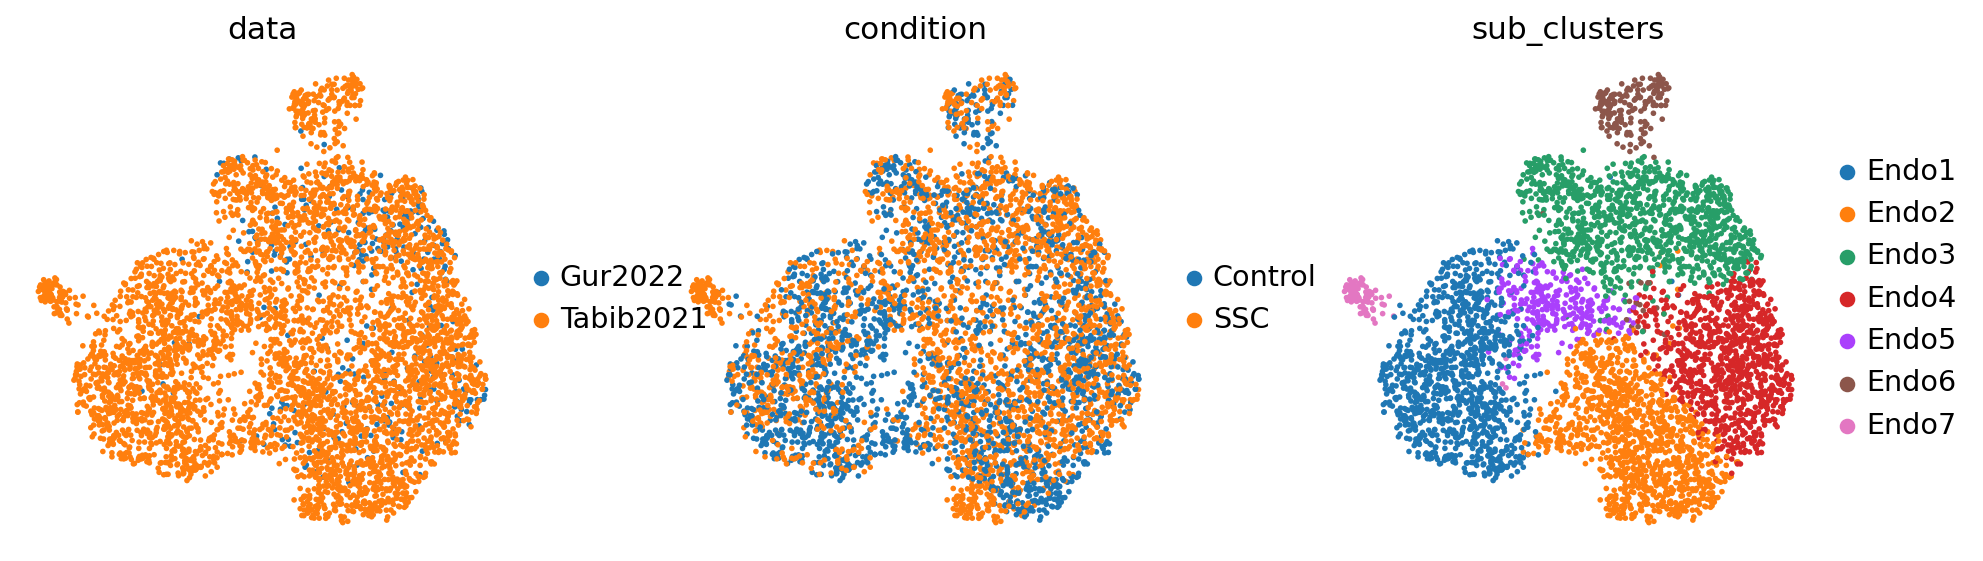

In [5]:
sc.set_figure_params(figsize=(4, 4))
sc.pl.umap(adata, color=['data', 'condition', 'sub_clusters'], frameon=False, ncols=3)

In [6]:
adata_LEC = adata[adata.obs['sub_clusters'] == "Endo6"]

In [7]:
adata_LEC

View of AnnData object with n_obs × n_vars = 185 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'condition_colors', 'data_colors', 'dendrogram_sub_clusters', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

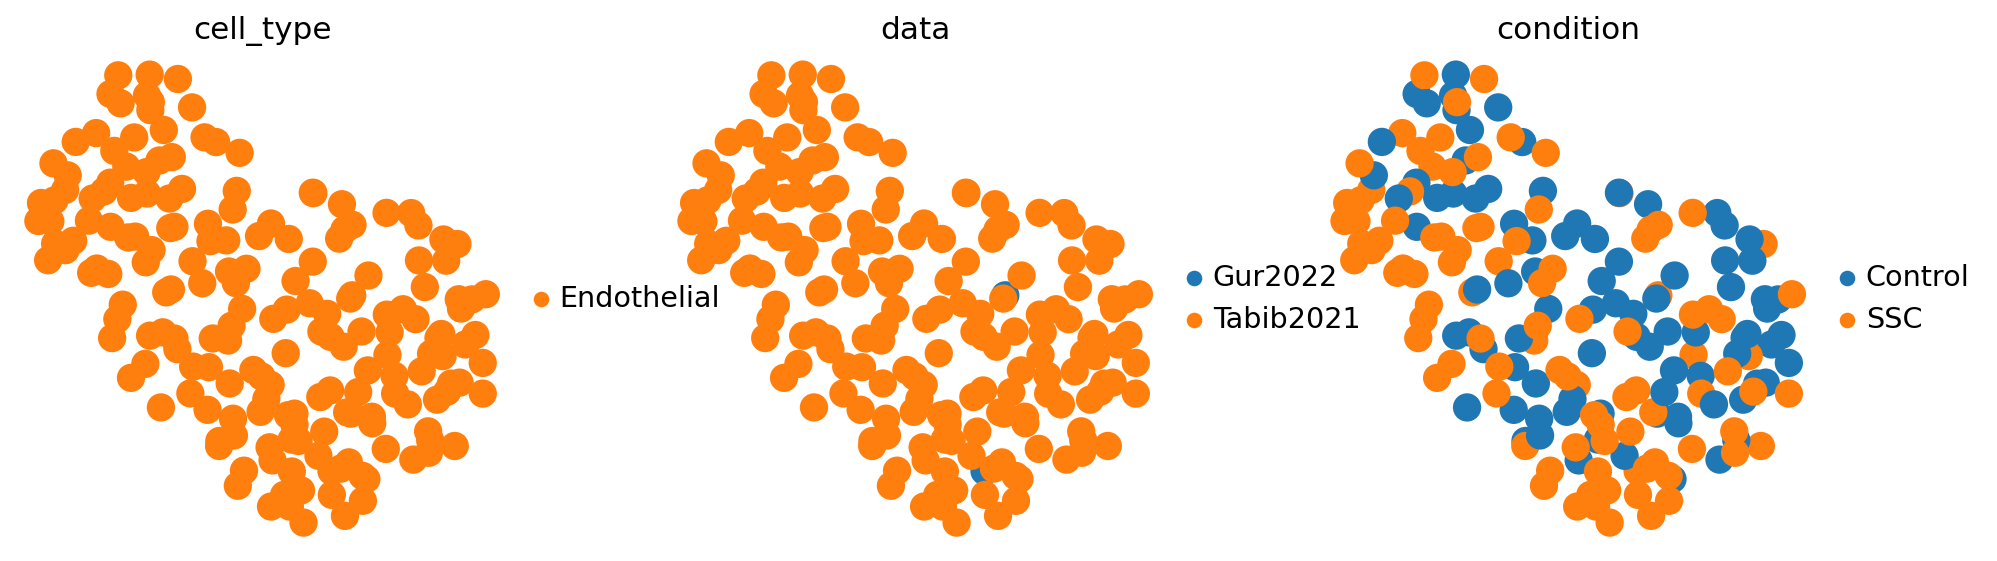

In [8]:
sc.pp.neighbors(adata_LEC, use_rep='X_pca_harmony', n_neighbors=30)
sc.tl.umap(adata_LEC)
sc.pl.umap(adata_LEC, color=['cell_type', 'data', 'condition'], frameon=False)

In [9]:
sc.tl.leiden(adata_LEC, key_added="leiden", resolution=0.5)

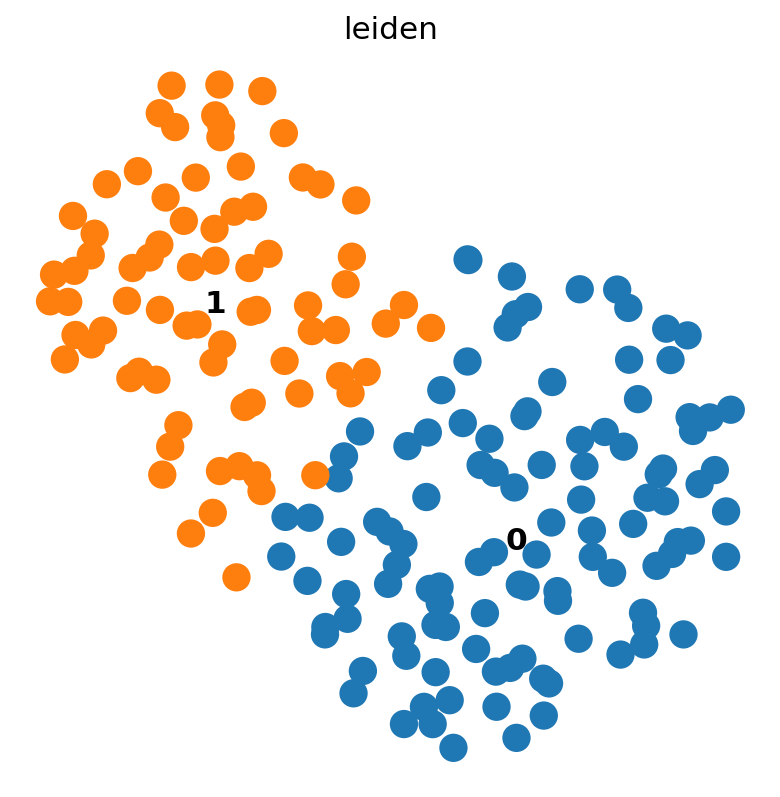

In [10]:
sc.set_figure_params(figsize=(6, 6))

sc.pl.umap(adata_LEC, color=['leiden'], frameon=False, legend_loc='on data')

In [11]:
# find marker genes
adata_LEC.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata_LEC, 'leiden', method='wilcoxon')
result = adata_LEC.uns['rank_genes_groups']

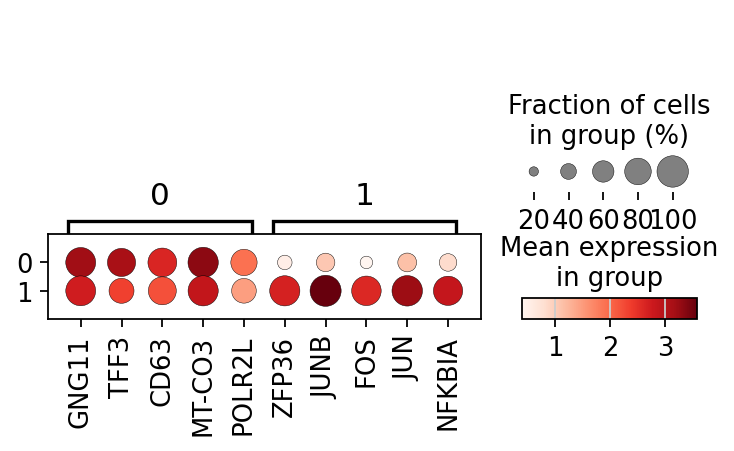

In [12]:
sc.pl.rank_genes_groups_dotplot(adata_LEC, n_genes=5)

In [13]:
adata_VEC = adata[adata.obs['sub_clusters'] == "Endo5"]

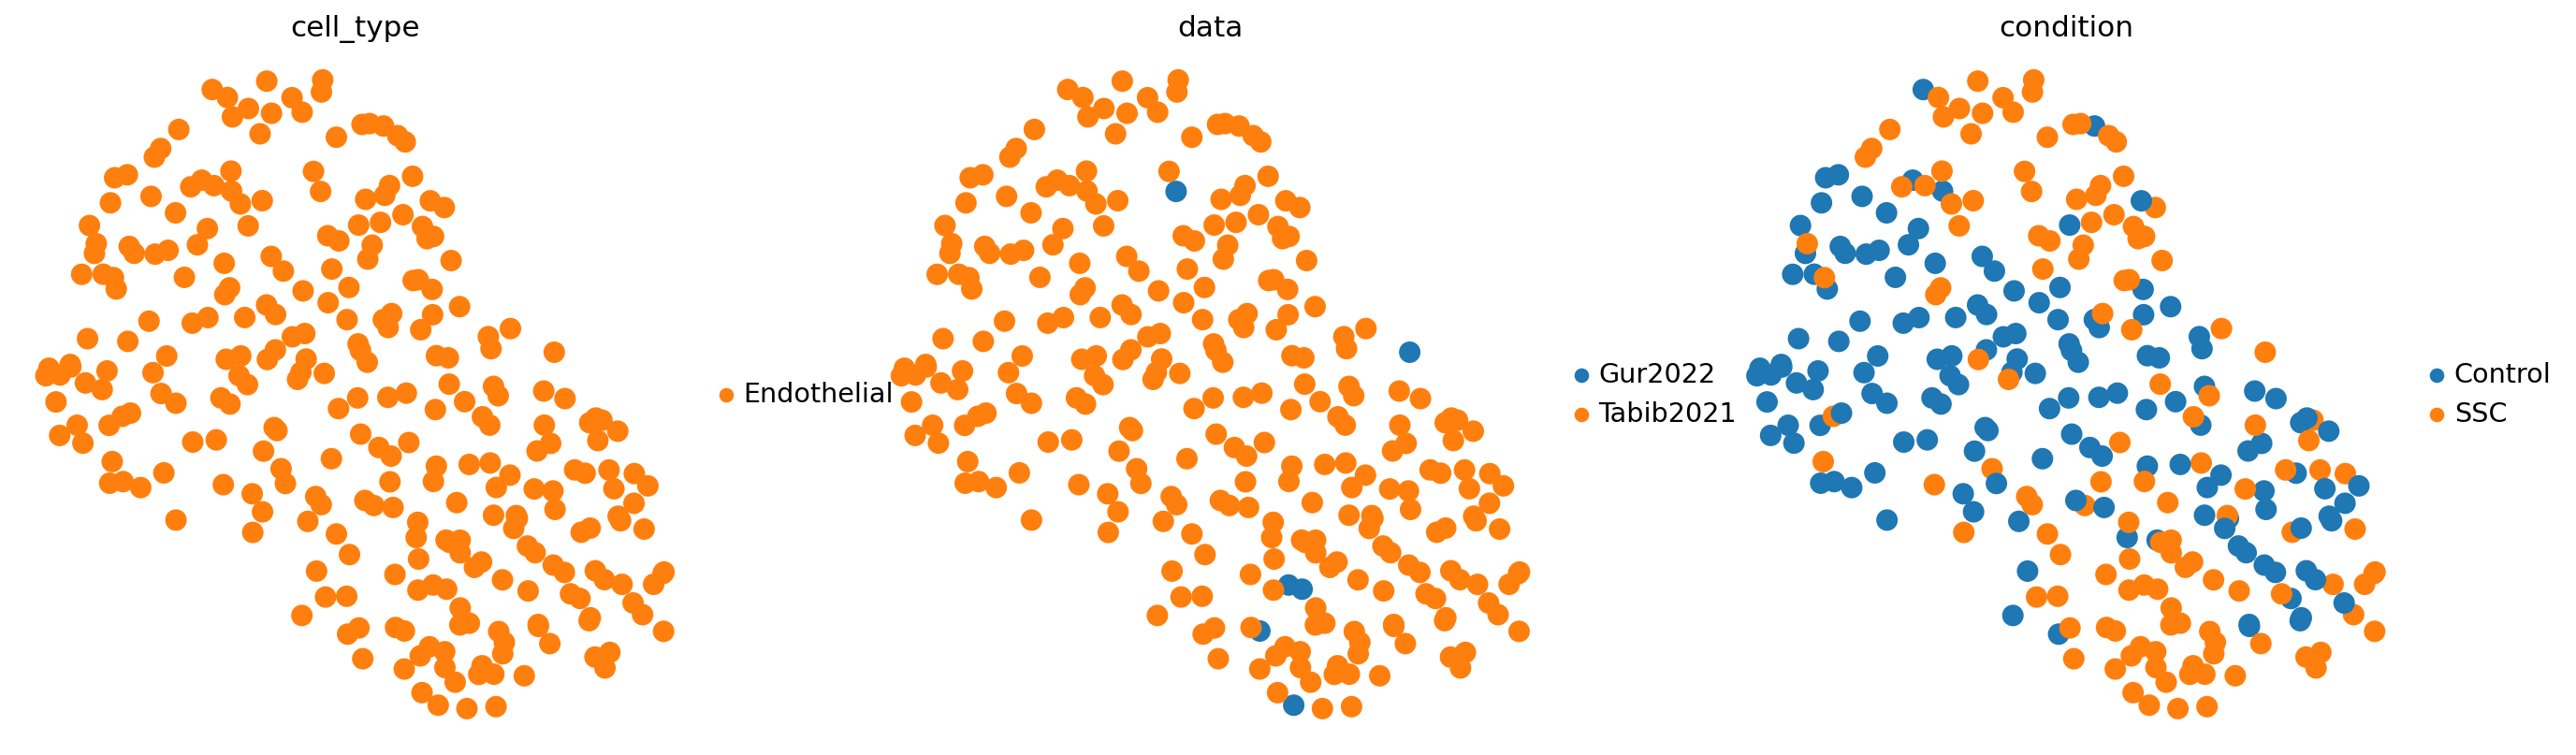

In [14]:
sc.pp.neighbors(adata_VEC, use_rep='X_pca_harmony', n_neighbors=30)
sc.tl.umap(adata_VEC)
sc.pl.umap(adata_VEC, color=['cell_type', 'data', 'condition'], frameon=False)

In [15]:
sc.tl.leiden(adata_VEC, key_added="leiden", resolution=0.5)

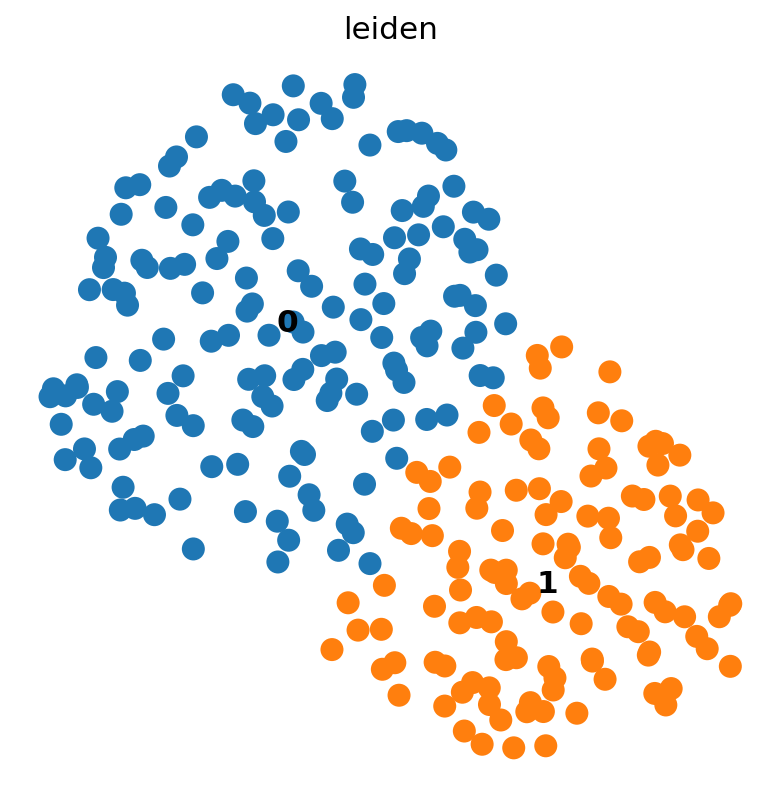

In [16]:
sc.set_figure_params(figsize=(6, 6))

sc.pl.umap(adata_VEC, color=['leiden'], frameon=False, legend_loc='on data')

In [17]:
# find marker genes
adata_VEC.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata_VEC, 'leiden', method='wilcoxon')
result = adata_VEC.uns['rank_genes_groups']

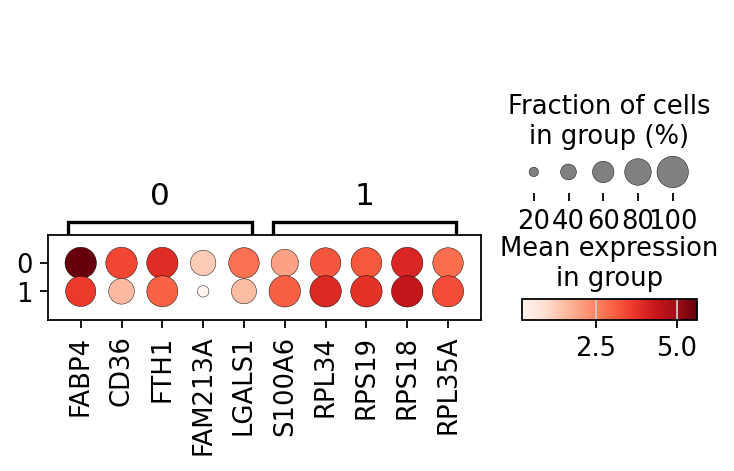

In [18]:
sc.pl.rank_genes_groups_dotplot(adata_VEC, n_genes=5)